# Explainable AI: Using Local Interpretable Model-agnostic Explanations (LIME)

Humans are becoming more and more dependent on Artificial Intelligence. However, the explainability of AI systems is still a subject of debate, and AI Solutions are referred to as 'Black Boxes'.

Local Interpretable Model-agnostic Explanations (LIME) is a framework which can help us understand the working of models to some extent. In this notebook, we will explore these two frameworks and the use-cases where they can be used.

## Setting Up

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# import the dataset
df = pd.read_csv('/content/wine.csv')

To get a glimpse of the dataset, we view its first few rows using the head() function from the Pandas library.

In [ ]:

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Preprocessing the Dataset

To begin, we check the dimensions of the dataset using the shape attribute of a pandas dataframe.

In [ ]:
# checking the dimensions of the dataframe
df.shape

(178, 14)

As we can see, there are 178 rows and 14 columns.

After that, we check for missing values. To do that, we use the isnull() and sum() functions from the Pandas library.

In [ ]:
# checking for missing values
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

As we can see, there are no missing values.

Next, we check if we need to encode categorical features. To do that, we use the dtypes attribute of a Pandas dataframe.

In [ ]:
# checking for encoding categorical features
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

As we can see, there are no categorical values. Hence, we donot need to encode any features.

Next, we check for outliers. To do that, we make a boxplot of all the attributes in the dataset using the boxplot() function from the Pandas library and aesthetic functions from the matplotlib library.

Text(0, 0.5, 'Values')

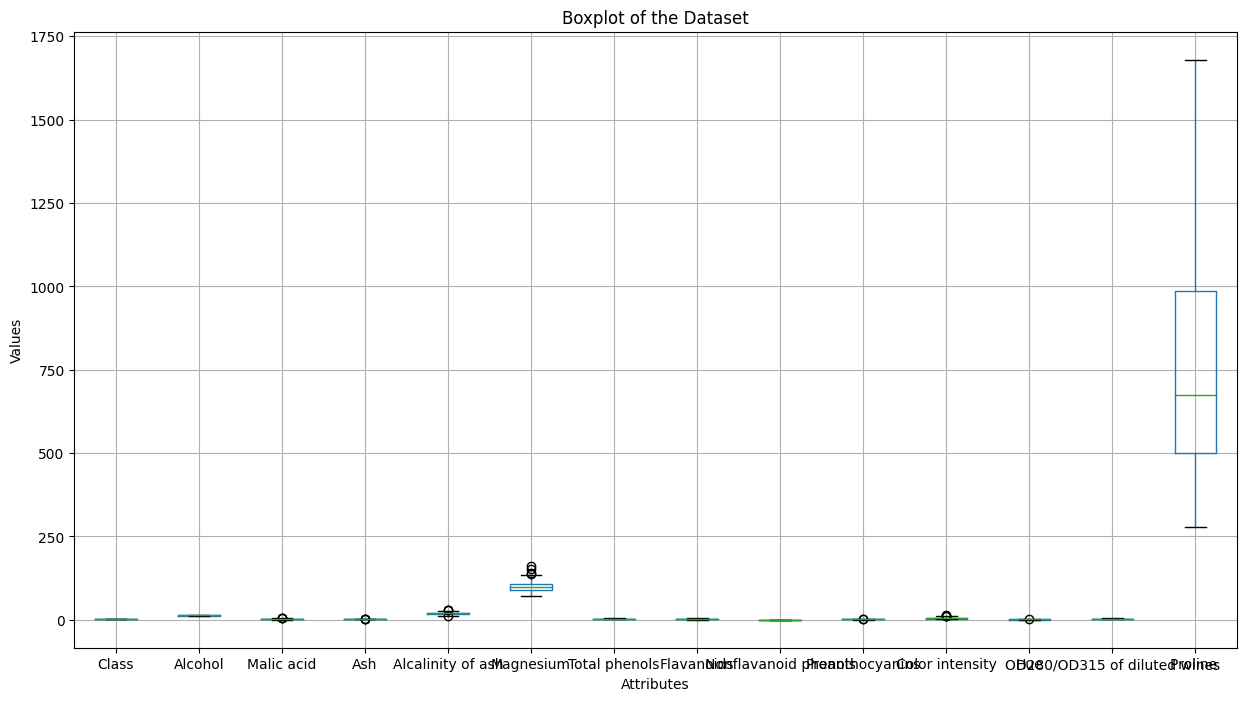

In [ ]:
# checking for outliers
plt.figure(figsize=(15,8))
df.boxplot()
plt.title('Boxplot of the Dataset')
plt.xlabel('Attributes')
plt.ylabel('Values')

As we can see, there is a neglible amount of outliers.

Next, we use the kdeplot() function from the Seaborn library to plot the distributions of the individual columns. We also use matplotlib functions to improve the aesthetics of the plots.

Text(0.5, 0, 'Values of Alcohol Content')

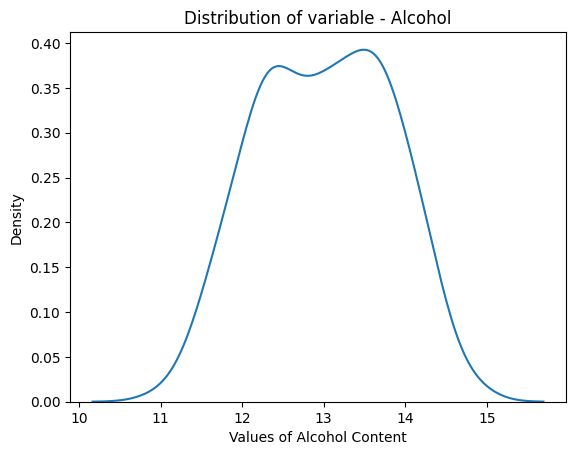

In [ ]:
# plotting the distribution of Alcohol content
plt.figure()
sns.kdeplot(df['Alcohol'])
plt.title('Distribution of variable - Alcohol')
plt.xlabel('Values of Alcohol Content')

As we can see, the distribution of alcohol content in the wine has two significant peaks.

Text(0.5, 0, 'Values of Malic Acid Content')

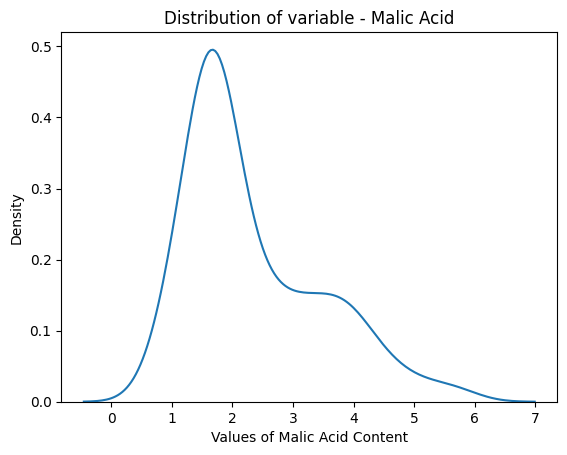

In [ ]:
# plotting the distribution of Malic Acid content
plt.figure()
sns.kdeplot(df['Malic acid'])
plt.title('Distribution of variable - Malic Acid')
plt.xlabel('Values of Malic Acid Content')

As we can see, the distribution of malic acid content is right skewed.

Text(0.5, 0, 'Values of Ash Content')

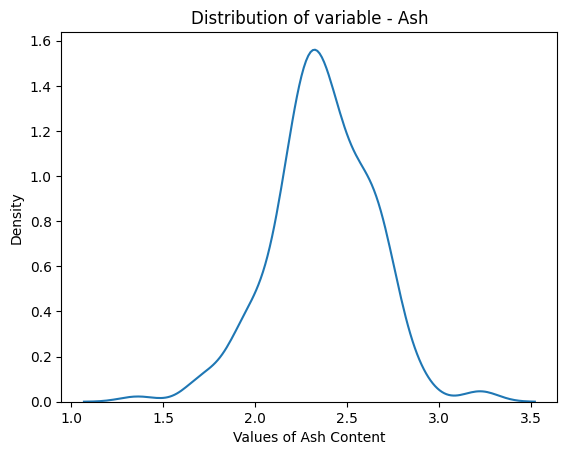

In [ ]:
# plotting the distribution of Ash content
plt.figure()
sns.kdeplot(df['Ash'])
plt.title('Distribution of variable - Ash')
plt.xlabel('Values of Ash Content')

As we can see, the distribution of ash content is slightly left skewed.

Text(0.5, 0, 'Values of Alcalinity of Ash')

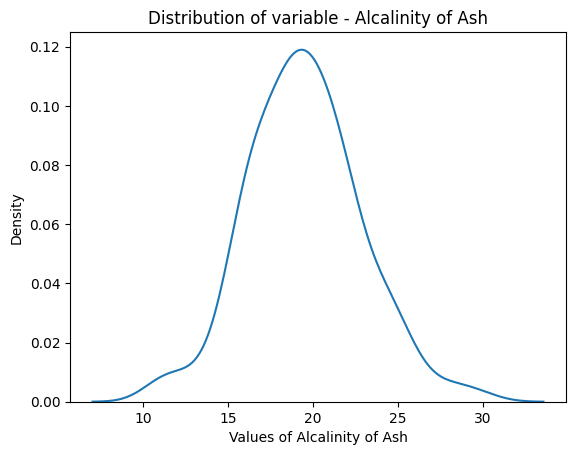

In [ ]:
# plotting the distribution of Alcalinity of Ash
plt.figure()
sns.kdeplot(df['Alcalinity of ash'])
plt.title('Distribution of variable - Alcalinity of Ash')
plt.xlabel('Values of Alcalinity of Ash')

As we can see, the alcalinity of ash is more or less normally distributed and is neglibly skewed.

Text(0.5, 0, 'Values of Magnesium Content')

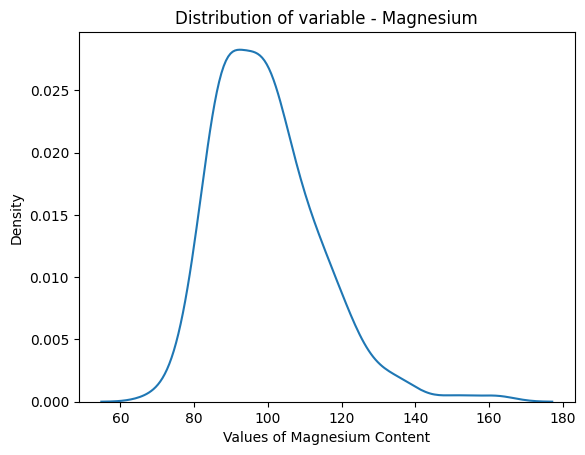

In [ ]:
# plotting the distribution of Magnesium content
plt.figure()
sns.kdeplot(df['Magnesium'])
plt.title('Distribution of variable - Magnesium')
plt.xlabel('Values of Magnesium Content')

As we can see, the distribution of magnesium content is slightly right skewed.

Text(0.5, 0, 'Values of Total Phenols Content')

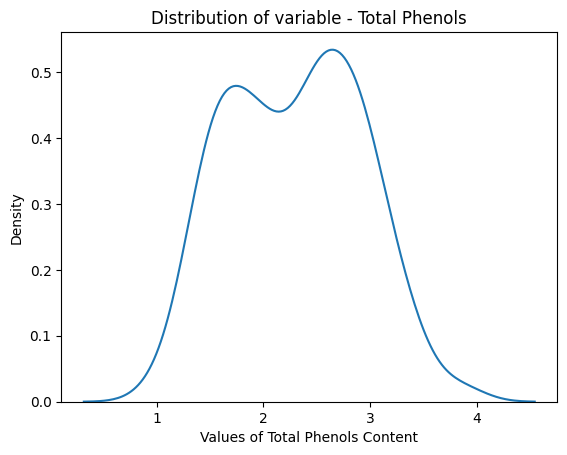

In [ ]:
# plotting the distribution of Total Phenols content
plt.figure()
sns.kdeplot(df['Total phenols'])
plt.title('Distribution of variable - Total Phenols')
plt.xlabel('Values of Total Phenols Content')

As we can see, the distribution of total phenols content is has two significant peaks.

Text(0.5, 0, 'Values of Flavanoids Content')

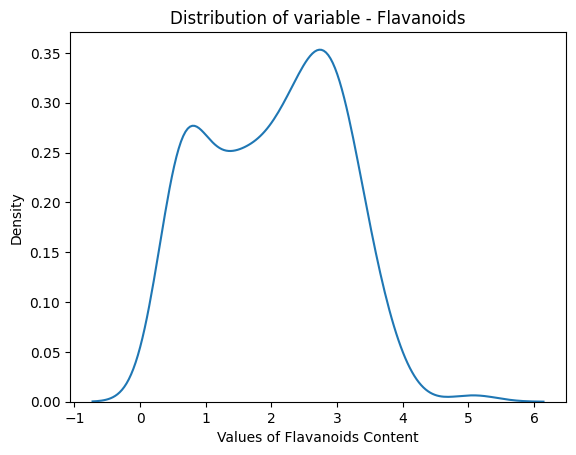

In [ ]:
# plotting the distribution of Flavanoids content
plt.figure()
sns.kdeplot(df['Flavanoids'])
plt.title('Distribution of variable - Flavanoids')
plt.xlabel('Values of Flavanoids Content')

As we can see, the distribution of flavanoids content has two significant peaks.

Text(0.5, 0, 'Values of Nonflavanoid Phenols Content')

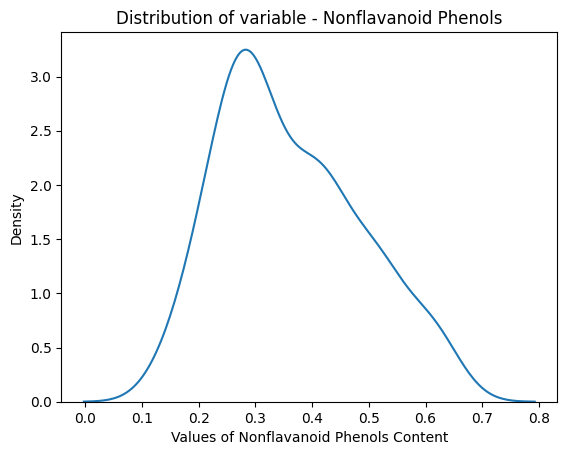

In [ ]:
# plotting the distribution of Nonflavanoid Phenols content
plt.figure()
sns.kdeplot(df['Nonflavanoid phenols'])
plt.title('Distribution of variable - Nonflavanoid Phenols')
plt.xlabel('Values of Nonflavanoid Phenols Content')

As we can see, the distribution of nonflavanoid phenols content is slightly right skewed.

Text(0.5, 0, 'Values of Proanthocyanins Content')

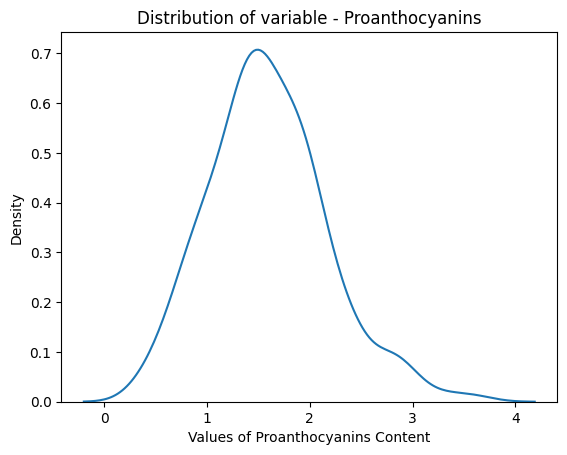

In [ ]:
# plotting the distribution of Proanthocyanins content
plt.figure()
sns.kdeplot(df['Proanthocyanins'])
plt.title('Distribution of variable - Proanthocyanins')
plt.xlabel('Values of Proanthocyanins Content')

As we can see, the distribution of proanthocyanins is slightly right skewed.

Text(0.5, 0, 'Values of Color Intensity')

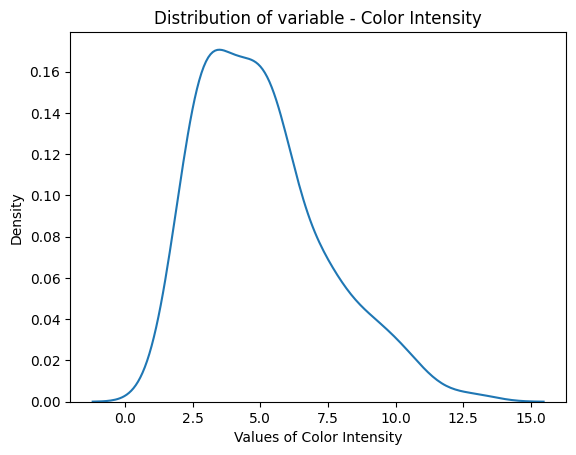

In [ ]:
# plotting the distribution of Color Intensity
plt.figure()
sns.kdeplot(df['Color intensity'])
plt.title('Distribution of variable - Color Intensity')
plt.xlabel('Values of Color Intensity')

As we can see, the distribution of color intensity is right skewed.

Text(0.5, 0, 'Values of Hue')

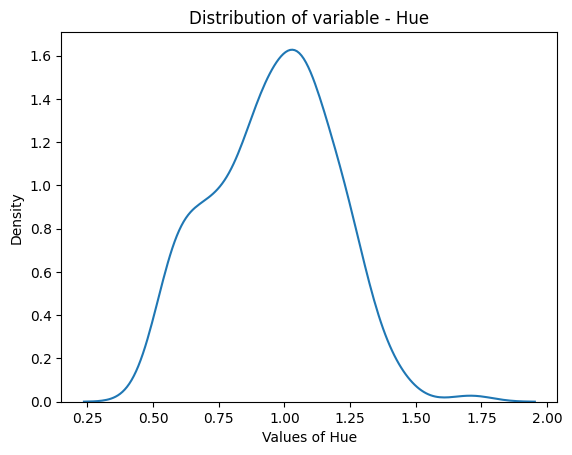

In [ ]:
# plotting the distribution of Hue
plt.figure()
sns.kdeplot(df['Hue'])
plt.title('Distribution of variable - Hue')
plt.xlabel('Values of Hue')

As we can see, the distribution of hue is not smooth and has peaks.

Text(0.5, 0, 'Values of OD280/OD315 of diluted wines')

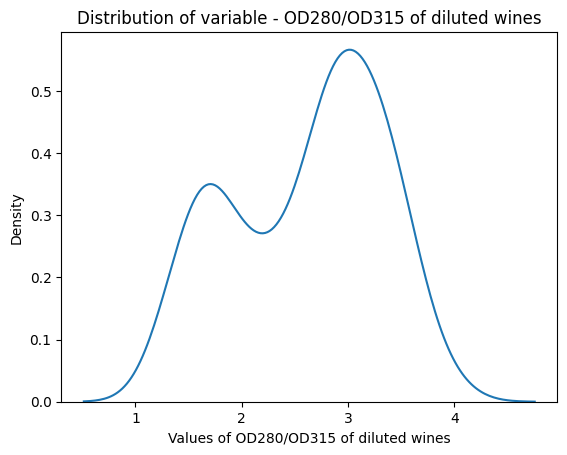

In [ ]:
# plotting the distribution of Values of OD280/OD315 of diluted wine
plt.figure()
sns.kdeplot(df['OD280/OD315 of diluted wines'])
plt.title('Distribution of variable - OD280/OD315 of diluted wines')
plt.xlabel('Values of OD280/OD315 of diluted wines')

As we can see, the distribution of OD280/OD315 of diluted wine has two significant peaks.

Text(0.5, 0, 'Values of Proline Content')

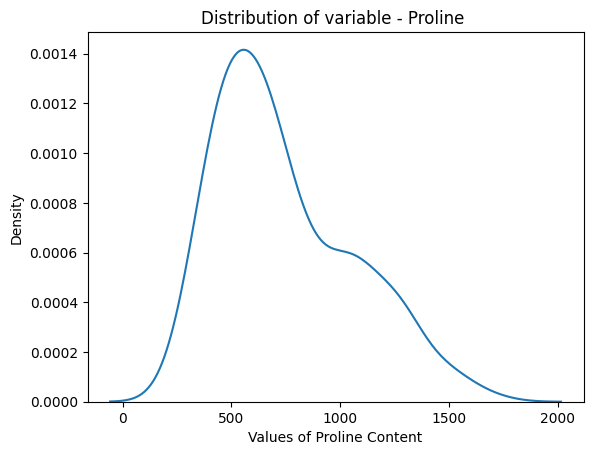

In [ ]:
# plotting the distribution of Proline content
plt.figure()
sns.kdeplot(df['Proline '])
plt.title('Distribution of variable - Proline ')
plt.xlabel('Values of Proline Content')

As we can see, the distribution of proline is slightly right skewed.

Although we do find some anomalies in the distribution, since the amount of data we have is less, we will not perform any transformations.

In this notebook, we plan to build a non-parametric model which does not assume a normal distribution. Hence, we donot scale the data.

## Model Building

In this notebook, we will be building a Random Forest model for classification.

To begin, we split the data into independent variables (x) and dependent variable (y) and use the train_test_split() function from the sklearn library and divide the dataset into training and testing sets.

In [ ]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['Class'])
y = df['Class']

# dividing the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=105)

After that, we build our model. To do that, we use the RandomForestClassifier() module from the sklearn library, and fix the random state to be 105 for consistent results.

In [ ]:
# building the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=105)

To optimize the model, we create a dictionary of the parameters and a list of their values that we want to search within for optimization. After that, we build a grid search model and fit the training data to analyze and test all the combinations of the parameters on a Random Forest Classifer model with 10 cross validations.

In [ ]:
# importing the necessary libraries
from sklearn.model_selection import GridSearchCV

# creating a dictionary and list of their values to optimize the model
params = {
    'n_estimators' : [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
}

# intiating a grid search to find the most optimum parameters
grid_search = GridSearchCV(model, params, cv=10)

# fitting the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=105),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 500, 1000]})

Next, we use the best_estimator_ attribute of the grid search model to obtain the best parameters for the Random Forest Classifer. We then fit the training data on the best model and use the classification_report() funtion from the sklearn library to tabulate the model performance.

In [ ]:
# obtaining the best model
model = grid_search.best_estimator_

# fitting the training data
model.fit(x_train, y_train)

# obtaining the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Great, now that we have built our model, let's analyze how it is working out!

## Explainability via LIME

Local Interpretable Model-agnostic Explanations (LIME) - the word Local means that we can analyze the predictions of individual instances. We'll see just how in the following section! To begin, we import the lime library. Since we are dealing with tabular data, we also import lime_tabular.

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=38c6fddca6059bdd8c26f9cc061aafcb0112a5b575c0aa05e6de9ff31342d06a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# importing lime
import lime
from lime import lime_tabular

Next, we create an object of the LimeTabularExplainer class from the lime_tabular module. To that, we pass our training data in the form a NumPy array (essential syntactically), the feature names (using the columns attribute of a Pandas dataframe), class names, and since this is a classification problem, we set the mode to be 'classification'.

In [ ]:
# creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), feature_names=x_train.columns,
            class_names=['1', '2', '3'], mode='classification')

After that, we derive the explanation of an instance using the explain_instance function on the previously instantiated lime_explainer. Below are the parameters we have passed:

- data_row: we pass one row of the data to be explained
- predict_fn: since we want the probability or confidence with which the classifier has made the prediction, we set the value of this parameter to be predict_proba
- top_labels: since we have 3 classes, we set this parameter to be 6 (2x3), so that we get the probability of being classified as a class and not classified as that class for each class
- num_features: since we want to know the weightage of every feature in the classification, we set the parameter to be 13 (total number of features in the notebook)

Following that we use the show_in_notebook() function to print out the explanation.

In [ ]:
# obtaining the explanation
explanation = lime_explainer.explain_instance(data_row=x_test.iloc[1], predict_fn=model.predict_proba, top_labels=6, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


As we can see:
- the model predicts class 1 with 9% confidence, class 2 with 85% confidence, and class 3 with 6% confidence.
- each of the attribute holds certain weightage in predicting the occurence of a class depending on a particular threshold. For example, the threshold for the attribute 'proline' is 513.75, above which increases the chance of it being in class 2 or 3 with weightages 0.14 and 0.02 respectively, whereas below it increases the chance of it being in class 3 with weightage 0.17. Here, the value of proline is 510, thus, increasing its probability of being in class 1.

In a similar way, we can analyze each and every prediction in the dataset. Not much of a black box now, is it?

---